In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train=pd.read_csv('Train.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


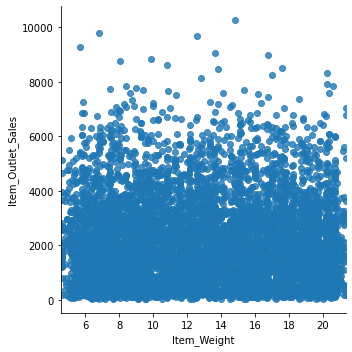

In [3]:
sns.lmplot("Item_Weight", "Item_Outlet_Sales", data=train)
plt.show()

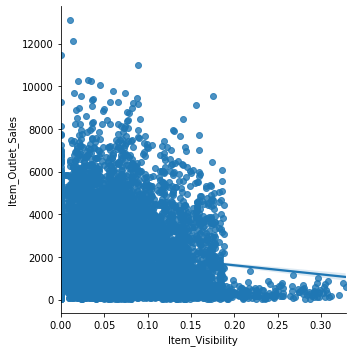

In [4]:
sns.lmplot("Item_Visibility", "Item_Outlet_Sales", data=train) ## scatter plot between sales and weight
plt.show()

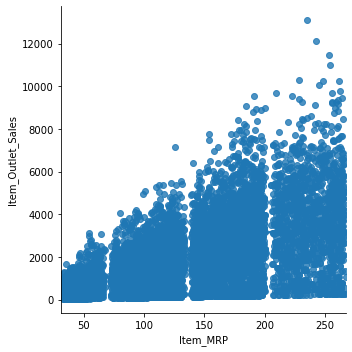

In [5]:
sns.lmplot("Item_MRP", "Item_Outlet_Sales", data=train) ## scatter plot between sales and weight
plt.show()

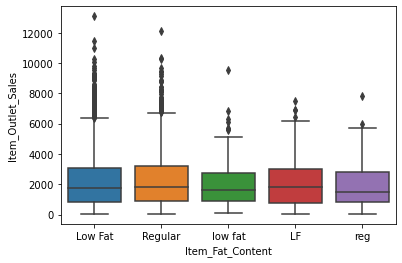

In [6]:
sns.boxplot(x="Item_Fat_Content",y="Item_Outlet_Sales",data=train)

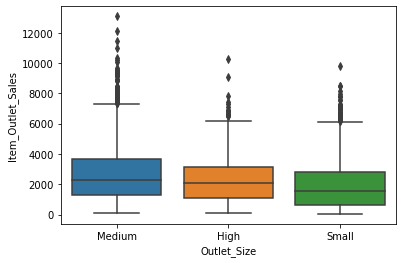

In [7]:
sns.boxplot(x="Outlet_Size",y="Item_Outlet_Sales",data=train)

In [8]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
sum(train['Item_Weight'].isnull())  ## to check total missing values
sum(train['Item_Visibility'].isnull())  ## to check total missing values

0

In [10]:
train.apply(lambda x :sum(x.isnull())) 

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
## Impute the missing values ## function to be used is fillna()
train['Item_Weight'].fillna(12.6,inplace=True)  ## missing is replaced by 12.6
train['Outlet_Size'].value_counts()## value_counts to get the freq
train['Outlet_Size'].fillna('Medium',inplace=True) ## missing is replaced by Medium
train.apply(lambda x :sum(x.isnull())) 

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [12]:
from sklearn import preprocessing  ## sklern is ML library-- preprocessing 
encoding=preprocessing.LabelEncoder() ## create label encoding object
train['Item_Fat_Content'] = encoding.fit_transform(train['Item_Fat_Content'])
train['Item_Type'] = encoding.fit_transform(train['Item_Type'])
train['Outlet_Identifier'] = encoding.fit_transform(train['Outlet_Identifier'])
train['Outlet_Size'] = encoding.fit_transform(train['Outlet_Size'])
train['Outlet_Location_Type'] = encoding.fit_transform(train['Outlet_Location_Type'])
train['Outlet_Type'] = encoding.fit_transform(train['Outlet_Type'])

In [13]:
train.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,DRC01,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,FDN15,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,FDX07,19.20,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,NCD19,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [14]:
 from sklearn.model_selection import train_test_split, cross_val_score

In [15]:
## Building a Linear Model
#X_train=train[features] ## 
#y_train=train['Item_Outlet_Sales']  ##


#features=['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Identifier',
 #        'Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Typ','Outlet_Type']
features=['Item_Weight','Item_Visibility','Outlet_Type','Item_MRP','Outlet_Identifier','Outlet_Establishment_Year',
         'Outlet_Size','Outlet_Location_Type','Outlet_Type']  ## list of features
X_train,X_test,y_train,y_test = train_test_split(train[features],train['Item_Outlet_Sales'], test_size=0.3, random_state=0)



In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
### use Linear Model for regression ## 

features=['Item_Weight','Item_Visibility','Outlet_Type','Item_MRP','Outlet_Identifier','Outlet_Establishment_Year',
         'Outlet_Size','Outlet_Location_Type','Outlet_Type']  ## list of features

X_train,X_test,y_train,y_test = train_test_split(train[features],train['Item_Outlet_Sales'], test_size=0.3, random_state=0)

regr = LinearRegression() ### Create linear regression object
regr.fit(X_train, y_train) ## fit train/fit the model
regr.score(X_test, y_test)  ### check the accuracy on test set
scores = cross_val_score(regr, train[features],train['Item_Outlet_Sales'], cv=5) ##scoring='mean_squared_error'
scores


array([0.52804868, 0.50523583, 0.48905649, 0.50921545, 0.50899239])

In [18]:
pred=regr.predict(X_test) ## predict the sales / target variable on new dataset
pred

array([2485.23692549, 2487.87928871, 1824.63453616, ..., 2307.22374521,
       2151.90489933, 2353.40609424])

In [19]:
from sklearn.ensemble import RandomForestRegressor


In [20]:
rf = RandomForestRegressor(n_estimators=200, criterion='mse',max_depth=10, min_samples_split=1,verbose=0,random_state=0)

In [24]:
scores = cross_val_score(rf, X_train,y_train, cv=5) ##scoring='mean_squared_error'
scores


c:\users\umara\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\umara\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\umara\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\umara\appdata\local\programs\python\python38\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\umara\appdata\local\programs\python\python38\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

c:\users\umara\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\umara\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\umara\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\umara\appdata\local\programs\python\python38\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\umara\appdata\local\programs\python\python38\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

array([nan, nan, nan, nan, nan])

In [22]:
train.apply(lambda x :sum(x.isnull())) 

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64